# HD211847 1

In [6]:
from mingle.utilities.db_utils import SingleSimReader, DBExtractor, df_contour
import matplotlib.pyplot as plt
%matplotlib inline
from mingle.utilities.param_file import parse_paramfile

In [7]:
chi2 = "coadd_chi2"
chi2 = "chi2_1"

In [8]:
starname = "HD4747"
obsnums = [1, ]
rvs = [-0.2]
gammas = [-0.15]

In [9]:
!cat ~/Desktop/Inbox/a/tuned/paper-HD211847/HD211847.sh 

cat: /home/jneal/Desktop/Inbox/a/tuned/paper-HD211847/HD211847.sh: No such file or directory


In [10]:
correct = parse_paramfile("/home/jneal/Phd/data/parameter_files/HD4747_params.dat")
correct.update({"teff_1":correct["temp"], "teff_2":correct["comp_temp"],
                "logg_1":correct["logg"], "logg_2":correct["comp_logg"],
                "feh_1":correct["fe_h"], "feh_2":correct["comp_fe_h"], "gamma":-.216, "rv":-0.219--0.154})
print(correct)
print("Host temp =", correct["temp"], "K,\tEstimated companion =", correct["comp_temp"], "K")

{'name': 'hd4747', 'companion': 'b', 'mean_val': -0.2149, 'k1': 0.7553, 'omega': 269.1, 'eccentricity': 0.74, 'tau': 50463.1, 'period': 13826.2, 'i': 66.8, 'a': 16.4, 'msini': 39.6, 'm_true': 60.2, 'm_star': 0.81, 'spt': 'g9v', 'temp': 5340.0, 'fe_h': -0.22, 'logg': 4.65, 'comp_temp': 1733.0, 'comp_logg': 5.39, 'comp_fe_h': 0.22, 'r_star': 0.79, 'dist': 18.69, 'age': 3.3, 'source': 'https://arxiv.org/pdf/1604.00398.pdf  creep 2016', 'teff_1': 5340.0, 'teff_2': 1733.0, 'logg_1': 4.65, 'logg_2': 5.39, 'feh_1': -0.22, 'feh_2': 0.22, 'gamma': -0.216, 'rv': -0.065}
Host temp = 5340.0 K,	Estimated companion = 1733.0 K


# Observation 1 - BHM

In [11]:
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base="/home/jneal/Phd/Analysis/Paper_results/paper-{}".format(starname),
                       name=starname, mode="bhm", suffix="*", obsnum=obs)

    extractor = DBExtractor(observation.get_table())

    df_min = extractor.minimum_value_of(chi2)

    cols = ['gamma', chi2, 'teff_1','logg_1', 'feh_1']

    fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()

  
    df_contour(df, "teff_1", "gamma", chi2, df_min, ["logg_1", "feh_1"], correct=correct, dof=2)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(df_min[["teff_1", "logg_1", "gamma", "feh_1", chi2]].head())


########################
Observation # 1 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD4747/HD4747/bhm
0
check number of databases found (should be 1)
[] 0


AssertionError: None

# Observation 1 - IAM


########################
Observation # 1 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847/HD211847/iam
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(152320, 9)
Using chisquare dof= 4


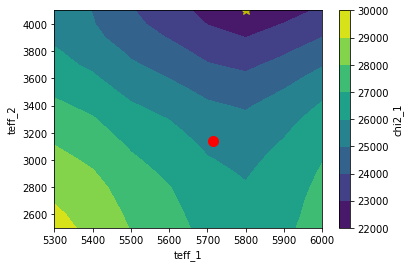

Using chisquare dof= 4


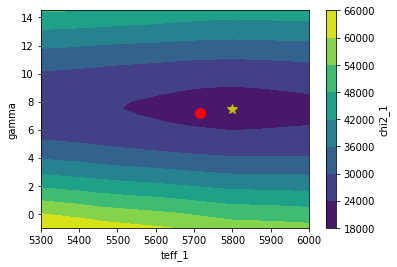

Using chisquare dof= 4


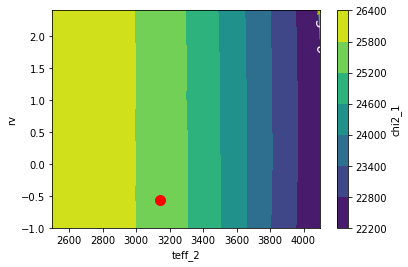

Min Chi2 result for obs= 1
    index  teff_2  logg_2  feh_2  alpha_1  npix_1   rv  gamma      chi2_1  \
0  114226    4100     5.0    0.0   0.0941     844  2.4    7.5  22284.1159   

   arbnorm_1  ...    arbnorm_3  alpha_4  npix_4      chi2_4  arbnorm_4  \
0       1.02  ...         1.01   0.0968     763  23973.3675       1.01   

    coadd_chi2  coadd_npix  teff_1  logg_1  feh_1  
0  112483.0155        3335  5800.0     4.5    0.0  

[1 rows x 27 columns]
########################
Observation # 2 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847/HD211847/iam
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(152320, 9)
Using chisquare dof= 4


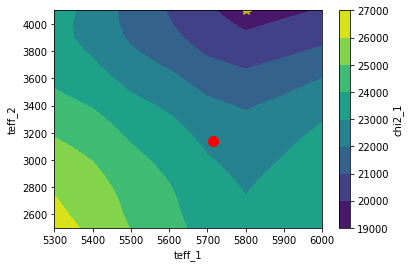

Using chisquare dof= 4


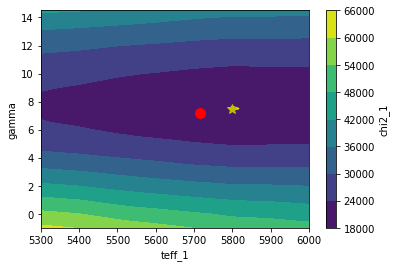

Using chisquare dof= 4


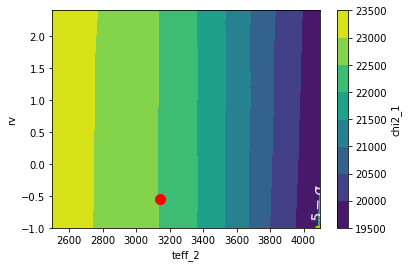

Min Chi2 result for obs= 2
    index  teff_2  logg_2  feh_2  alpha_1  npix_1   rv  gamma      chi2_1  \
0  113138    4100     5.0    0.0   0.0941     829 -1.0    7.5  19613.9267   

   arbnorm_1  ...    arbnorm_3  alpha_4  npix_4      chi2_4  arbnorm_4  \
0       1.02  ...         1.01   0.0963     655  29923.3501       1.01   

    coadd_chi2  coadd_npix  teff_1  logg_1  feh_1  
0  110231.8958        3160  5800.0     4.5    0.0  

[1 rows x 27 columns]


In [13]:
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base="/home/jneal/Phd/Analysis/Paper_results/paper-{}".format(starname),
                       name=starname, mode="iam", suffix="*", obsnum=obs)

    extractor = DBExtractor(observation.get_table())

    df_min = extractor.minimum_value_of(chi2)

    cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
                chi2, 'teff_1','logg_1', 'feh_1']


    fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()
    
    
    df_contour(df, "teff_1", "teff_2", chi2, df_min, ["gamma", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour(df, "teff_1", "gamma", chi2, df_min, ["teff_2", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour(df, "teff_2", "rv", chi2, df_min, ["gamma", "teff_1"], correct=correct, dof=4)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(extractor.minimum_value_of(chi2).head())
  
